### 딥-러닝 과정 MLP 

## Keras 모델 생성/학습 - 보스턴 집값 예측 모델

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/Regression-Tutorial-with-Keras-Deep-Learning-Library-in-Python.jpg)

* CRIM: per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

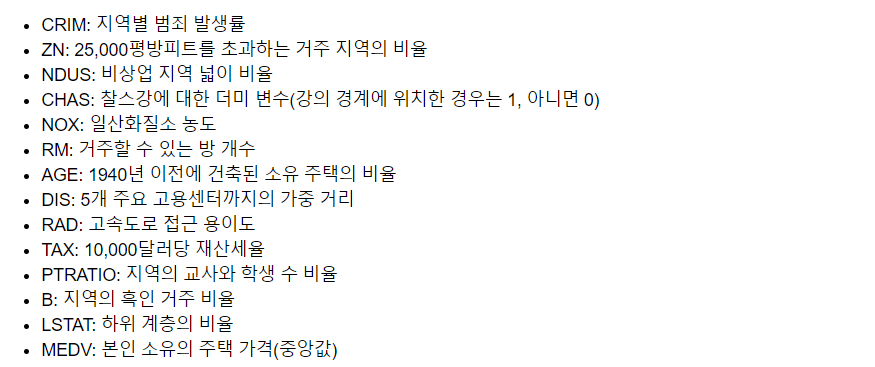

In [1]:
# 1. 데이터 불러오기
import pandas as pd
df = pd.read_csv('BostonHousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
# 2. 데이터 살펴보기
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:title={'center':'Boston'}>

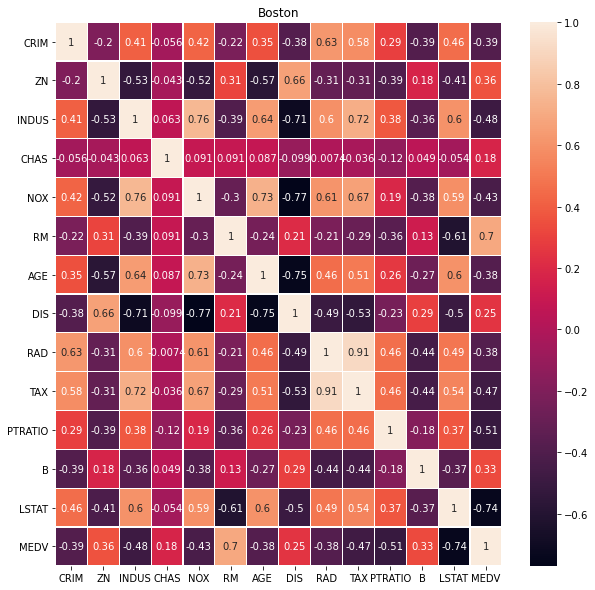

In [4]:
# 3. 데이터 상관관계 확인 
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(10,10))
plt.title('Boston')
sns.heatmap(df.corr(), linewidths=0.1, linecolor='white', annot=True)

In [5]:
# 4.X/y 분리(featrue selection)
# DIS, TAX를 빼고 X에 넣어주어도 된다.(상관관계에 따라서)
y = df.iloc[:,-1]
X = df.drop(['MEDV'], axis=1, inplace=False)
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [6]:
# 4-1. Train/Test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_test.shape)
print(y_val.shape)

(404, 13)
(404,)
(51, 13)
(51, 13)
(51,)
(51,)


In [7]:
# 5. Data 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [8]:
# 6. MLP 모델 생성
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation

model = keras.Sequential()
# 128, 512, 512, 128 이런식으로 쓸 수 있다.
# 확키워서 사용하고 오버피팅나면 숫자를 줄이는 식으로 진행한다.
model.add(Dense(input_dim=13, units=128))
model.add(Activation('relu'))

# dropout은 어디에 줄 지 모르겠으면 중간에 주는 것이 좋다.
from keras.layers import Dropout
model.add(layers.Dropout(0.2))

model.add(Dense(units=64))
model.add(Activation('relu'))

model.add(Dense(units=1))
model.add(Activation('relu')) # linear를 사용해도 가능하다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0

In [9]:
# lr 조정하는법
# ? keras.optimizers.Adam

In [10]:
# 7. Compile - Optimizer, Loss function 설정
from keras.optimizers import Adam
adam = Adam()
# 회귀문제로 mse를 사용해준다. 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [11]:
# 8.학습시키기
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 베스트 모델 저장(.h5 파일)
# 파일이 알아서 저장되어서 생성된다.
model_path = 'keras_house_model.h5'
model_checkpoint = ModelCheckpoint(filepath=model_path, monitor='mae', save_best_only=True)


# valdation을 안만들고도 사용이 가능하다.
# valiation_split=0.1 이라고 추가해주면 학습데이터의 10%를 검증셋으로 활용한다는 의미이다.
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=100, verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 18ms/step - loss: 588.9110 - mae: 22.2941 - val_loss: 362.0387 - val_mae: 16.8697
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 347.3951 - mae: 16.2881 - val_loss: 149.5533 - val_mae: 9.3283
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 122.4064 - mae: 8.9080 - val_loss: 73.4369 - val_mae: 6.8429
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 55.2032 - mae: 5.6906 - val_loss: 38.6330 - val_mae: 4.7049
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 35.0598 - mae: 4.4840 - val_loss: 26.3943 - val_mae: 3.7599
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 30.6099 - mae: 4.1165 - val_loss: 22.9405 - val_mae: 3.4436
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 29.7240 - mae: 3.9667 - val_loss: 20.7880 - val_mae: 3.2217
Epoch 8/100
26/26 [==============================] - 0s 2ms/

26/26 [==============================] - 0s 3ms/step - loss: 10.3880 - mae: 2.4018 - val_loss: 13.2465 - val_mae: 2.7019
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 8.7572 - mae: 2.2721 - val_loss: 13.2615 - val_mae: 2.5661
Epoch 64/100
26/26 [==============================] - 0s 2ms/step - loss: 11.5588 - mae: 2.4723 - val_loss: 13.2885 - val_mae: 2.5999
Epoch 65/100
26/26 [==============================] - 0s 2ms/step - loss: 8.8049 - mae: 2.1535 - val_loss: 13.0652 - val_mae: 2.5528
Epoch 66/100
26/26 [==============================] - 0s 2ms/step - loss: 9.9027 - mae: 2.3719 - val_loss: 12.8099 - val_mae: 2.5291
Epoch 67/100
26/26 [==============================] - 0s 2ms/step - loss: 7.7047 - mae: 2.1412 - val_loss: 12.9706 - val_mae: 2.5264
Epoch 68/100
26/26 [==============================] - 0s 2ms/step - loss: 12.9188 - mae: 2.5595 - val_loss: 13.6396 - val_mae: 2.5678
Epoch 69/100
26/26 [==============================] - 0s 2ms/step - loss: 10.83

In [12]:
# 9. Model Evaluate
from sklearn.metrics import r2_score, mean_squared_error
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)

mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
rmse = (mse)**1/2
print(mse)
print(rmse)
print(r2)

2/2 [==============================] - 0s 2ms/step - loss: 7.2722 - mae: 2.1482
7.272184615266167
3.6360923076330836
0.9347813703804567


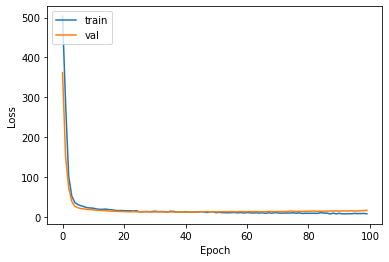

In [13]:
# 10. 학습 시각화하기
# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()